In [40]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load dataset
df = pd.read_csv('student.csv')

In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [29]:
# melihat nilai parental_education_level
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [43]:
# mengisi nilai kosong parental_education_level dengan modus
parental_modus = df['parental_education_level'].mode()[0]
print(parental_modus)
df['parental_education_level'] = df['parental_education_level'].fillna(parental_modus)

High School


In [31]:
# mengecek kembali informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [33]:
# melihat statistik ringkas
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


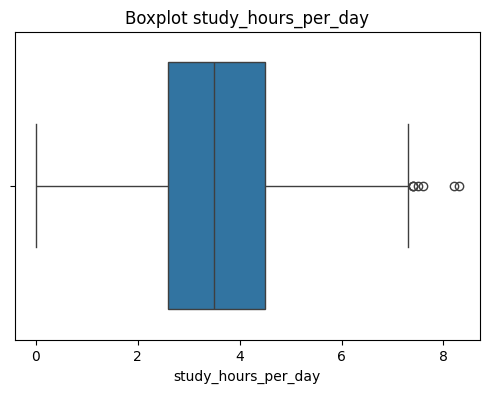

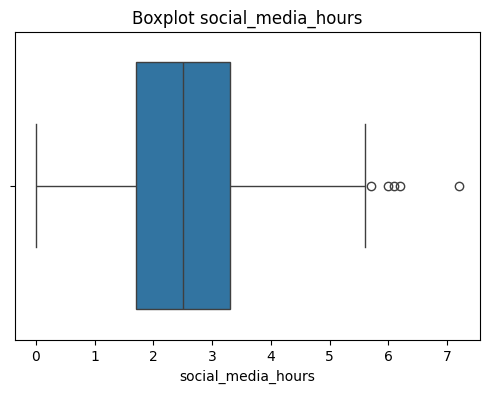

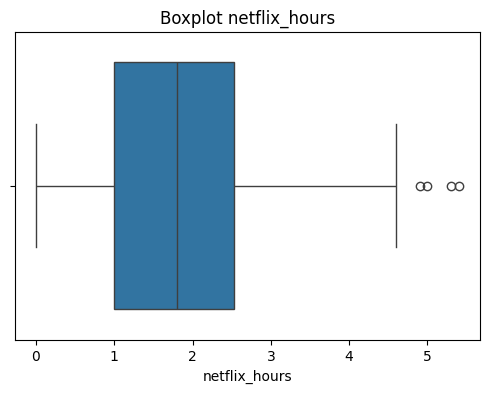

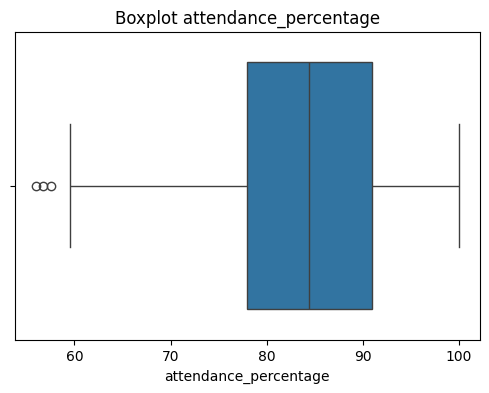

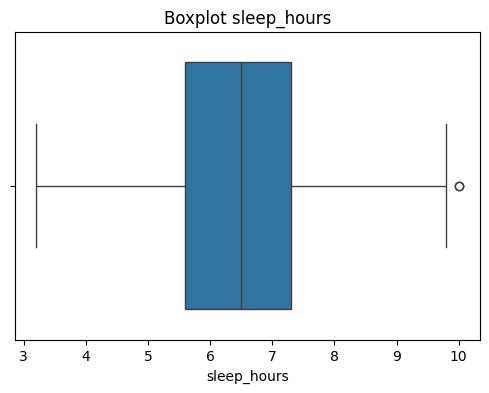

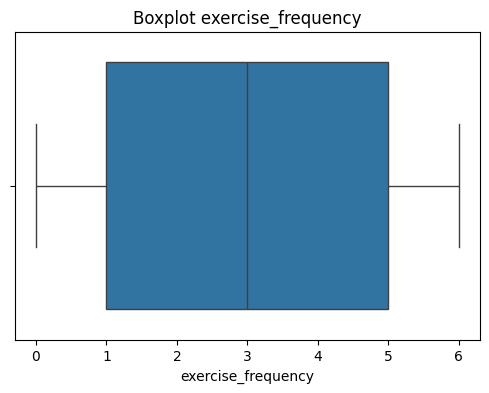

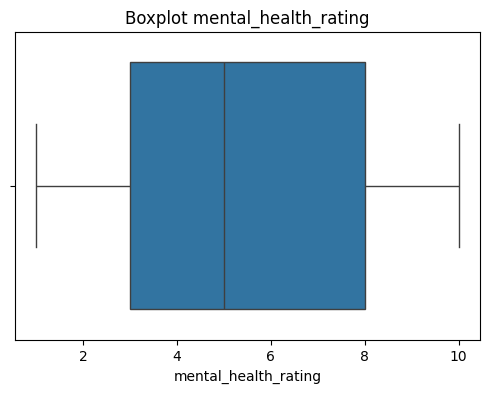

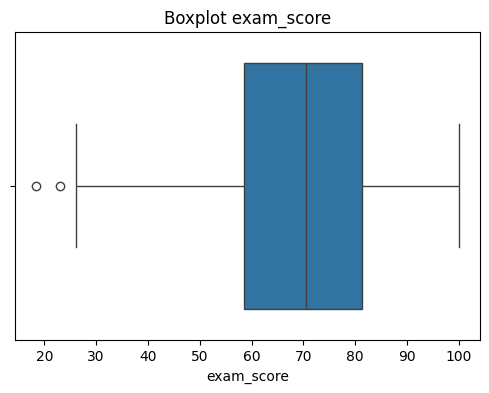

In [ ]:
kolom_numerik = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                 'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                 'mental_health_rating', 'exam_score']



for kolom in kolom_numerik:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[kolom])
    plt.title(f'Boxplot {kolom}')
    plt.show()

In [44]:
df.to_csv('student_bersih.csv',index=False)

In [45]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv("student_bersih.csv")

# 1. Korelasi study hours vs exam score
r1, _ = pearsonr(df["study_hours_per_day"], df["exam_score"])

# Rata-rata skor untuk >6 jam
mean_6h = df.loc[df["study_hours_per_day"] > 6, "exam_score"].mean()

# 2. Korelasi media sosial & Netflix
r_sm, _ = pearsonr(df["social_media_hours"], df["exam_score"])
r_nf, _ = pearsonr(df["netflix_hours"], df["exam_score"])

# Kuartil tertinggi vs terendah Netflix
q4 = df["netflix_hours"].quantile(0.75)
q1 = df["netflix_hours"].quantile(0.25)
mean_q4 = df.loc[df["netflix_hours"] >= q4, "exam_score"].mean()
mean_q1 = df.loc[df["netflix_hours"] <= q1, "exam_score"].mean()

# 3. Tidur & mental-health
r_sleep_mh, _ = pearsonr(df["sleep_hours"], df["mental_health_rating"])
mean_sleep7 = df.loc[df["sleep_hours"] >= 7, "exam_score"].mean()

# 4. Ekstrakurikuler
mean_extra = df.loc[df["extracurricular_participation"] == "Yes", "exam_score"].mean()
mean_noextra = df.loc[df["extracurricular_participation"] == "No", "exam_score"].mean()
delta_extra = mean_extra - mean_noextra

# 5. Median skor per parental education
median_parent = (
    df.groupby("parental_education_level")["exam_score"]
      .median()
      .sort_values(ascending=False)
)

print(r1, mean_6h, r_sm, r_nf, mean_q4, mean_q1,
      r_sleep_mh, mean_sleep7, delta_extra, median_parent)


0.8254185093960442 97.76818181818182 -0.16673288510861672 -0.17177923845531573 66.512 73.71610486891385 -0.006507964872229755 72.11536231884058 0.031921466644533325 parental_education_level
Bachelor       71.7
High School    70.4
Master         66.8
Name: exam_score, dtype: float64
